In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_data_info = "../Matplotlib/city_data.csv"
ride_data_info = "../Matplotlib/ride_data.csv"

city_file = pd.read_csv(city_data_info)
ride_file = pd.read_csv(ride_data_info)

merged_data = pd.merge(city_file, ride_file, how='outer', on='city')
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [3]:
city_type = merged_data.groupby('type')
count_rides = city_type['type'].count()
count_rides

type
Rural        125
Suburban     625
Urban       1625
Name: type, dtype: int64

In [4]:
urban = merged_data[merged_data["type"] == "Urban"]
urban_count = urban.groupby(["city"]).count()["ride_id"]
urban_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [5]:
suburban = merged_data[merged_data["type"] == "Suburban"]
suburban_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [6]:
rural = merged_data[merged_data["type"] == "Rural"]
rural_count = rural.groupby(["city"]).count()["ride_id"]
rural_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [19]:
urban_avg_fare = urban.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural.groupby(["city"]).mean()["fare"]

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [8]:
urban_drivers = urban.groupby(["city"]).mean()["driver_count"]
suburban_drivers = suburban.groupby(["city"]).mean()["driver_count"]
rural_drivers = rural.groupby(["city"]).mean()["driver_count"]

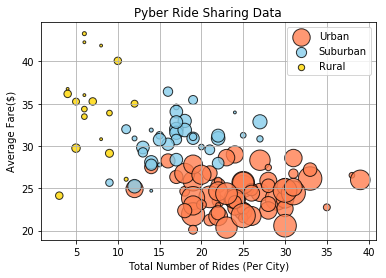

In [9]:
plt.scatter(urban_count, urban_avg_fare, s=8*urban_drivers, alpha=0.8, marker="o", c="coral", edgecolor="black", label="Urban")
plt.scatter(suburban_count, suburban_avg_fare, s=8*suburban_drivers, alpha=0.8, marker="o", c="skyblue", edgecolor="black", label="Suburban")
plt.scatter(rural_count, rural_avg_fare, s=8*rural_drivers, alpha=0.8, marker="o", c="gold", edgecolor="black", label="Rural")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend()
plt.grid()
plt.savefig("../Matplotlib/Pyber_Scatter.png")
plt.show()

In [10]:
total_fare = 100 * merged_data.groupby(["type"]).sum()["fare"]/merged_data["fare"].sum()
total_fare

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

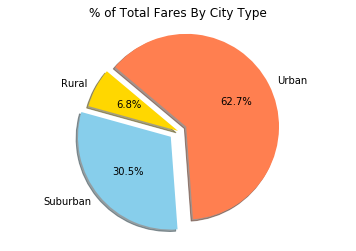

In [17]:
plt.pie(total_fare, explode=[0, 0.1, 0.1], labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"], autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares By City Type")
plt.savefig("../Matplotlib/Total_Fares_Pie.png")
plt.show()

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

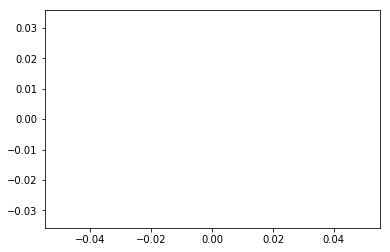

In [12]:
total_ride = 100 * merged_data.groupby(["type"]).sum()["ride_id"]/merged_data["ride_id"].sum()
total_ride

type
Rural        5.005212
Suburban    26.766723
Urban       68.228065
Name: ride_id, dtype: float64

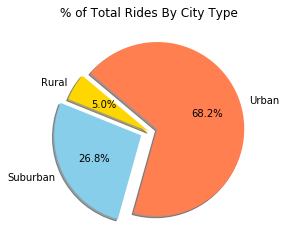

In [13]:
plt.pie(total_ride, explode=[0, 0.1, 0.1], labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"], autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides By City Type")
plt.savefig("../Matplotlib/Total_Ride_Pie.png")
plt.show()

In [14]:
total_driver = 100 * merged_data.groupby(["type"]).sum()["driver_count"]/merged_data["driver_count"].sum()
total_driver

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

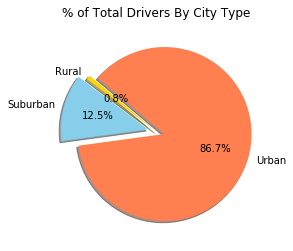

In [16]:
plt.pie(total_driver, explode=[0, 0.1, 0.1], labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"], autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers By City Type")
plt.savefig("../Matplotlib/Total_Driver_Pie.png")
plt.show()